<center><h1>Gunadi_Eben_HW4</h1></center>
<br>
<br>

Name: Eben Gunadi
<br>
Github Username: egunadi
<br>
USC ID: 3976793880

## 1. Take a centered 128 x 128 sub-image of Given CT Image Data set (Pick a section with lots of good features)

### (a) Obtain 180 Projections.

Import packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import radon, rescale
import pydicom
from skimage import exposure
import os
from numpy.fft import fft

Get the DICOM image

In [26]:
dicom_file = '../data/dcm/image12.dcm'
dicom_data = pydicom.dcmread(dicom_file)

# Extract pixel array from DICOM
dicom_image = dicom_data.pixel_array

# Save the original image as .png file
if not os.path.exists('../data/png'):
    os.makedirs('../data/png')

plt.imsave('../data/png/image12.png', dicom_image, cmap='gray')

# Print the shape of the image to check its dimensions
print(f"Original image dimensions: {dicom_image.shape}")

Original image dimensions: (512, 512)


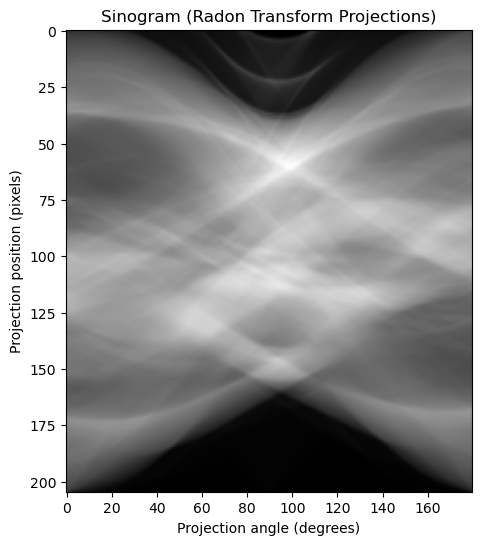

In [27]:
# Normalize the image (DICOM images can have large intensity ranges)
dicom_image = exposure.rescale_intensity(dicom_image, out_range=(0.0, 1.0))

# Rescale the image to 128x128
dicom_image = rescale(dicom_image, scale=0.4, mode='reflect', channel_axis=None)

# Define angles for projections (180 angles from 0 to 180 degrees)
# theta = np.linspace(0., 180., max(dicom_image.shape), endpoint=False)
theta = np.linspace(0., 180., 180, endpoint=False)

# Perform Radon Transform to obtain 180 projections
sinogram = radon(dicom_image, theta=theta, circle=True)

# Normalize the sinogram to display the full range of values
sinogram = exposure.rescale_intensity(sinogram, out_range=(0.0, 1.0))

# Plot sinogram (Projections)
plt.figure(figsize=(6, 6))
plt.imshow(sinogram, cmap='gray')
plt.title('Sinogram (Radon Transform Projections)')
plt.xlabel('Projection angle (degrees)')
plt.ylabel('Projection position (pixels)')

# Save the sinogram as .png file, including the x and y axes
plt.savefig('../data/png/image12_sinogram.png', bbox_inches='tight')

plt.show()

In [28]:
print(f"Sinogram shape: {sinogram.shape}")

Sinogram shape: (205, 180)


### (b) Take 1-D Fourier Transform of all Projections and 
### (c) Assemble them in the 2-D Frequency Domain

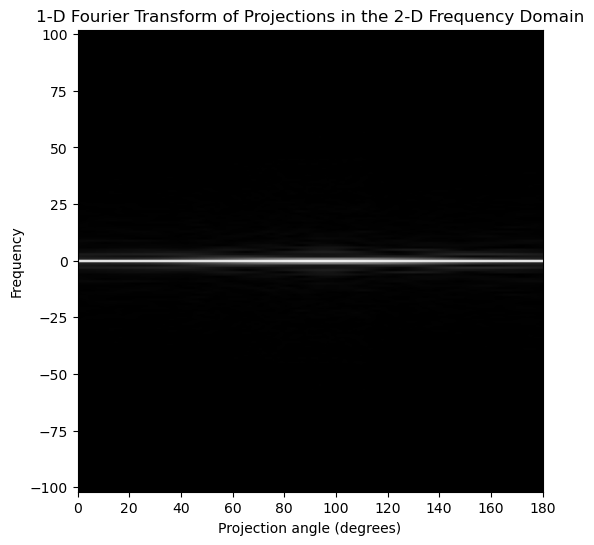

In [43]:
# Apply 1-D Fourier Transform to each projection
sinogram_fft = np.fft.fftshift(np.fft.fft(sinogram, axis=0), axes=0)

# Create frequency axis for the y-axis
num_detector_positions = sinogram.shape[0]
frequencies = np.fft.fftfreq(num_detector_positions)

# Apply fftshift to the frequencies to align with the shifted FFT
shifted_frequencies = np.fft.fftshift(frequencies) * num_detector_positions

# Plot the magnitude of the Fourier transform
plt.figure(figsize=(6, 6))
plt.imshow(np.abs(sinogram_fft), cmap='gray', aspect='auto', extent=[0, 180, shifted_frequencies.min(), shifted_frequencies.max()])
plt.title('1-D Fourier Transform of Projections in the 2-D Frequency Domain')
plt.xlabel('Projection angle (degrees)')
plt.ylabel('Frequency')

# Save the 1-D Fourier Transform as .png file, including the x and y axes
plt.savefig('../data/png/image12_1d_fourier_transform.png', bbox_inches='tight')

plt.show()

### (d) Compare Result Direct 2-D FT of the 128 x 128 Image.

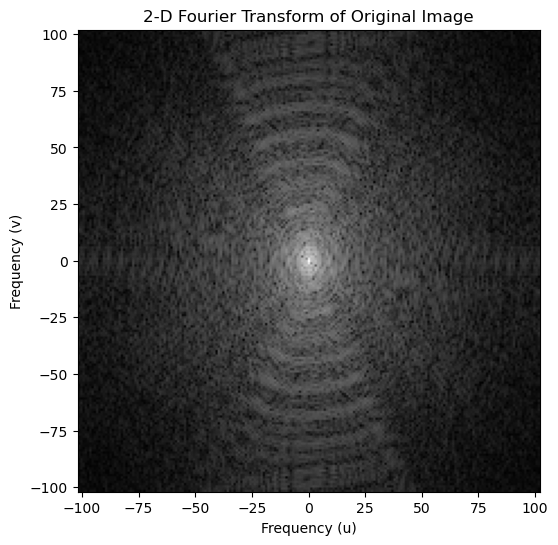

In [46]:
# Perform the 2D Fourier Transform on the original image (128x128 sub-image)
image_fft_2d = np.fft.fftshift(np.fft.fft2(dicom_image))

# Create frequency axes
num_pixels = dicom_image.shape[0]  # Assuming the image is square, so use shape[0]
freqs = np.fft.fftfreq(num_pixels)  # Generate frequency bins
shifted_freqs = np.fft.fftshift(freqs) * num_pixels  # Shift frequencies and scale

# Plot the magnitude of the 2D Fourier Transform with proper frequency axes
plt.figure(figsize=(6, 6))
plt.imshow(np.log(np.abs(image_fft_2d) + 1), cmap='gray', 
           extent=[shifted_freqs.min(), shifted_freqs.max(), shifted_freqs.min(), shifted_freqs.max()])

plt.title('2-D Fourier Transform of Original Image')
plt.xlabel('Frequency (u)')
plt.ylabel('Frequency (v)')

# Save the 2-D Fourier Transform as a .png file, including the axes
plt.savefig('../data/png/image12_2d_fourier_transform.png', bbox_inches='tight')

plt.show()

### (e) Perform Inverse 2-D FT & Compare Both Images

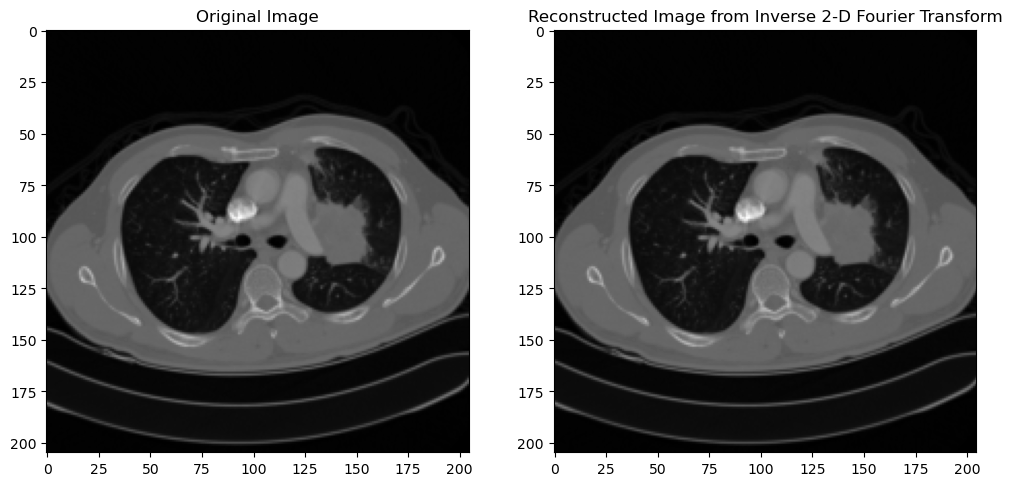

In [51]:
# Inverse 2-D Fourier Transform to reconstruct the image
reconstructed_image = np.fft.ifft2(np.fft.ifftshift(image_fft_2d))

# Compare the reconstructed image to the original
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(dicom_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(np.abs(reconstructed_image), cmap='gray')
plt.title('Reconstructed Image from Inverse 2-D Fourier Transform')

# Save the comparison as a .png file
plt.savefig('../data/png/image12_reconstructed_comparison.png', bbox_inches='tight')

plt.show()

## References and Citations

- https://scikit-image.org/docs/stable/user_guide/install.html